In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from bs4 import BeautifulSoup, SoupStrainer
import sys, string, requests, datetime, time
%matplotlib inline
import statsmodels.api as  sm
from scipy.stats import linregress

In [2]:
stats = pd.read_csv('Tables/Seasons_Stats.csv')
stats.sort_values(['Year'], ascending=False).head()

,Player,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,Ivica Zubac,2017.0,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
24299,Gerald Green,2017.0,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24297,Danny Green,2017.0,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
24296,Jerian Grant,2017.0,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
24295,Jerami Grant,2017.0,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


In [19]:
top90_3pa = stats.groupby('Player')['3PA'].sum().quantile(0.90)
print("Top 10% of career 3-point shots attempted: {}".format(top90_3pa))

Top 10% of career 3-point shots attempted: 1016.0


In [5]:
# player's career 3PA and 3PM
threePT_data = stats.groupby('Player')[['3PA', '3P']].sum().sort_values(by=['3P'], ascending=False)

# player's career 3pt attempt rate and 3pt percentage
PAr_Percent = pd.DataFrame(stats.groupby('Player')[['3PAr','3P%']].mean())

# merge two dataframes on index Player
threePT_data = pd.merge(threePT_data, PAr_Percent, left_index=True, right_index=True)

to90_3pa = stats.groupby('Player')['3PA'].sum().quantile(0.9) # find top 10% of career 3-points attempted (around 1,000)
threePT_data = threePT_data[threePT_data['3PA'] > to90_3pa] # narrrow players to top 10% 3PA
#threePT_data = threePT_data.sort_values('3PA', ascending=False)

threePT_data.head(10)

,3PA,3P,3PAr,3P%
Player,,,,
Ray Allen,7962.0,3174.0,0.401750,0.396950
Reggie Miller*,6486.0,2560.0,0.378500,0.391167
Kyle Korver,5409.0,2322.0,0.594222,0.427611
Vince Carter,6119.0,2292.0,0.304130,0.366652
Tim Hardaway,6349.0,2251.0,0.418333,0.352381
Chauncey Billups,5810.0,2245.0,0.438739,0.364174
Jason Terry,5895.0,2242.0,0.434667,0.379556
Jamal Crawford,6255.0,2191.0,0.382211,0.357895
Jason Kidd,6178.0,2168.0,0.396304,0.353304


In [6]:
threePA_threePP = threePT_data[['3PA', '3P%']]

from sklearn.cluster import KMeans # unsupervised
kmeans = KMeans(n_clusters=3)
kmeans.fit(threePA_threePP)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
threePA_threePP['category'] = pd.DataFrame(kmeans.labels_).values
threePA_threePP.head()

C:\Users\sonye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,3PA,3P%,category
Player,,,
Ray Allen,7962.0,0.396950,1
Reggie Miller*,6486.0,0.391167,1
Kyle Korver,5409.0,0.427611,1
Vince Carter,6119.0,0.366652,1
Tim Hardaway,6349.0,0.352381,1


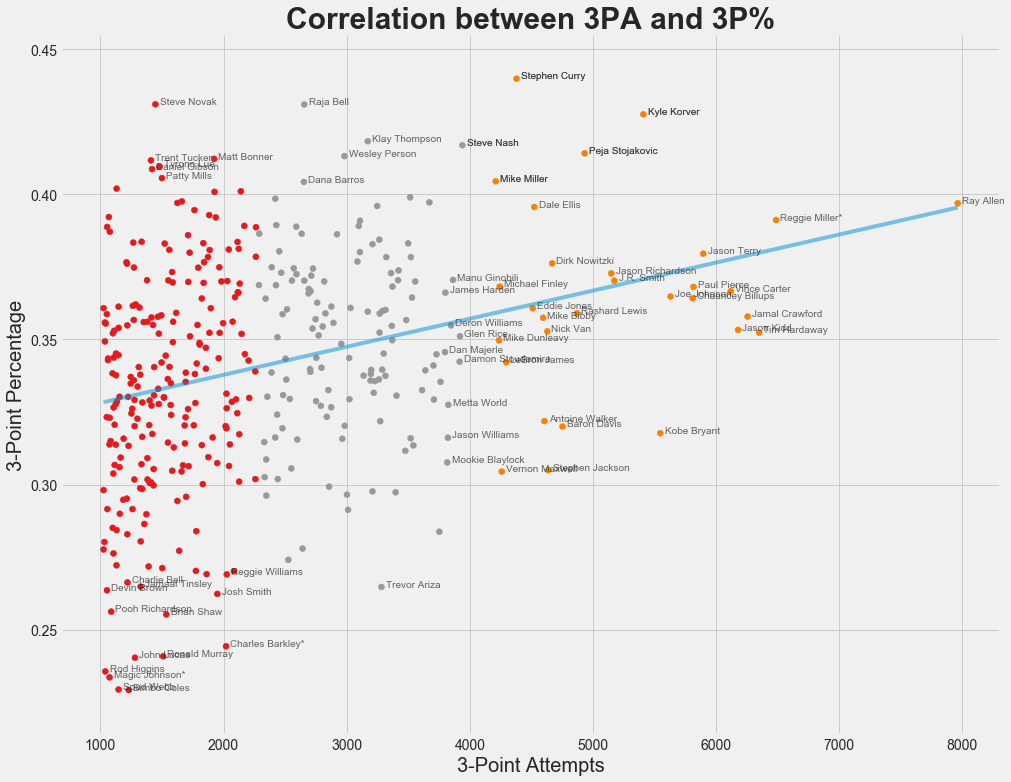

In [10]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PA']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PA'], threePT_data['3P%'], c=kmeans.labels_, cmap='Set1')
plt.title("Correlation between 3PA and 3P%", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempts", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PA']), 
         np.poly1d(np.polyfit(threePT_data['3PA'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PA'])), alpha=0.5)

def annotate(df):
    for i in range(len(df)):
        plt.text(df['3PA'][i]+35, df['3P%'][i], df.index[i], fontsize=10, alpha=.7)

annotate(threePT_data.sort_values('3PA', ascending=False)[:40])
annotate(threePT_data.sort_values('3P%', ascending=False)[:15])
annotate(threePT_data.sort_values('3P%', ascending=True)[:15])

plt.savefig('all-graphs/corr_3PA_3P%.png')

In [11]:
linregress(threePT_data['3PA'], threePT_data['3P%'])

LinregressResult(slope=9.672667995766632e-06, intercept=0.3184691991466108, rvalue=0.2987045047971458, pvalue=1.6049202995599209e-09, stderr=1.5648686984794115e-06)

In [12]:
from sklearn.cluster import KMeans # unsupervised
kmeans = KMeans(n_clusters=3)
kmeans.fit(threePT_data[['3PAr', '3P%']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

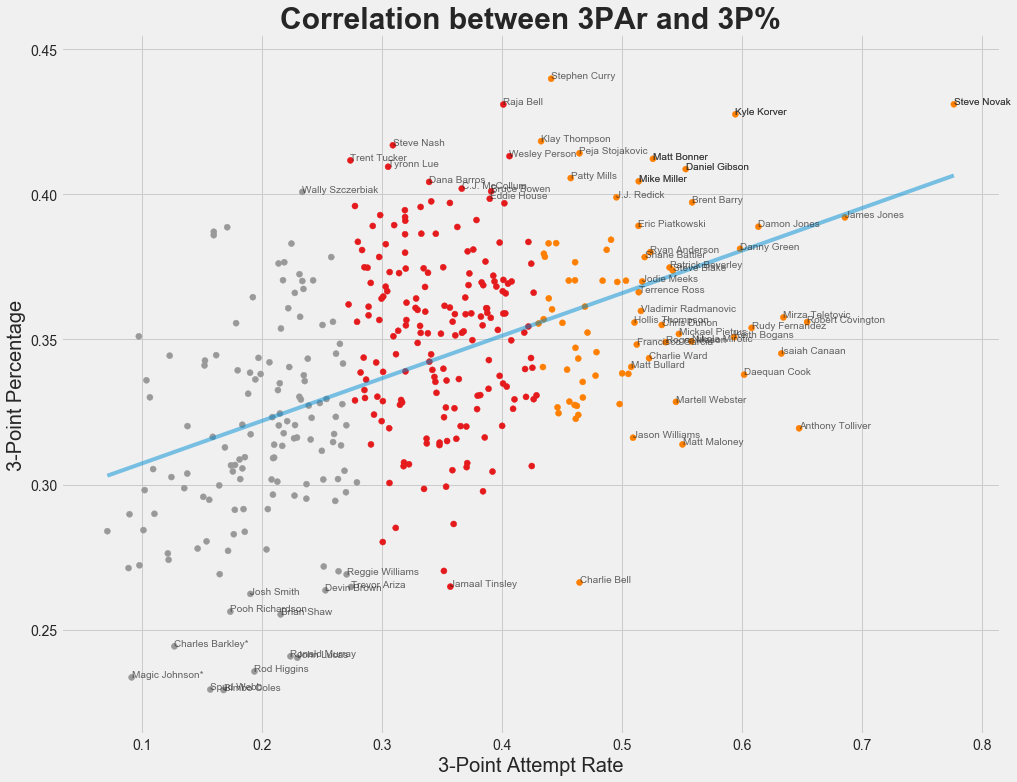

In [13]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PAr']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PAr'], threePT_data['3P%'], c=kmeans.labels_, cmap='Set1')
plt.title("Correlation between 3PAr and 3P%", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempt Rate", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PAr']), 
         np.poly1d(np.polyfit(threePT_data['3PAr'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PAr'])), alpha=0.5)

def annotate(df):
    for i in range(len(df)):
        plt.text(df['3PAr'][i], df['3P%'][i], df.index[i],
                fontsize=10, alpha=0.7)

annotate(threePT_data.sort_values('3PAr', ascending=False)[:35])
annotate(threePT_data.sort_values('3P%', ascending=False)[:20])
annotate(threePT_data.sort_values('3P%', ascending=True)[:15])

plt.savefig('all-graphs/corr_3PAr_3P%.png')

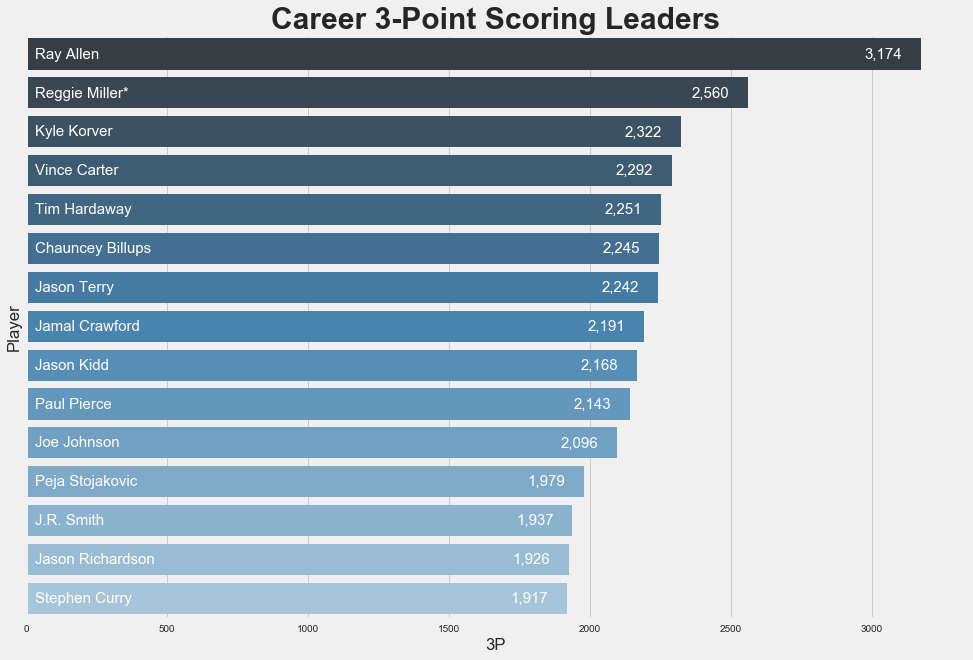

In [478]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

top_shooters = stats.groupby('Player').sum().sort_values(by='3P', ascending=False)
top_shooters = top_shooters[:15]
sns.barplot(x='3P', y=top_shooters.index, data=top_shooters, palette="Blues_d")

for num in range(len(top_shooters)):
    plt.text(top_shooters['3P'][num]-200, num, "{:,}".format(int(top_shooters['3P'][num])), color='white', size=15, verticalalignment='center')
    plt.text(30, num, top_shooters.index[num], color='white', size=15, verticalalignment='center')

plt.title("Career 3-Point Scoring Leaders", weight = 'bold', size = 30)
plt.gca().set_yticks([]);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text yticklabel objects>)

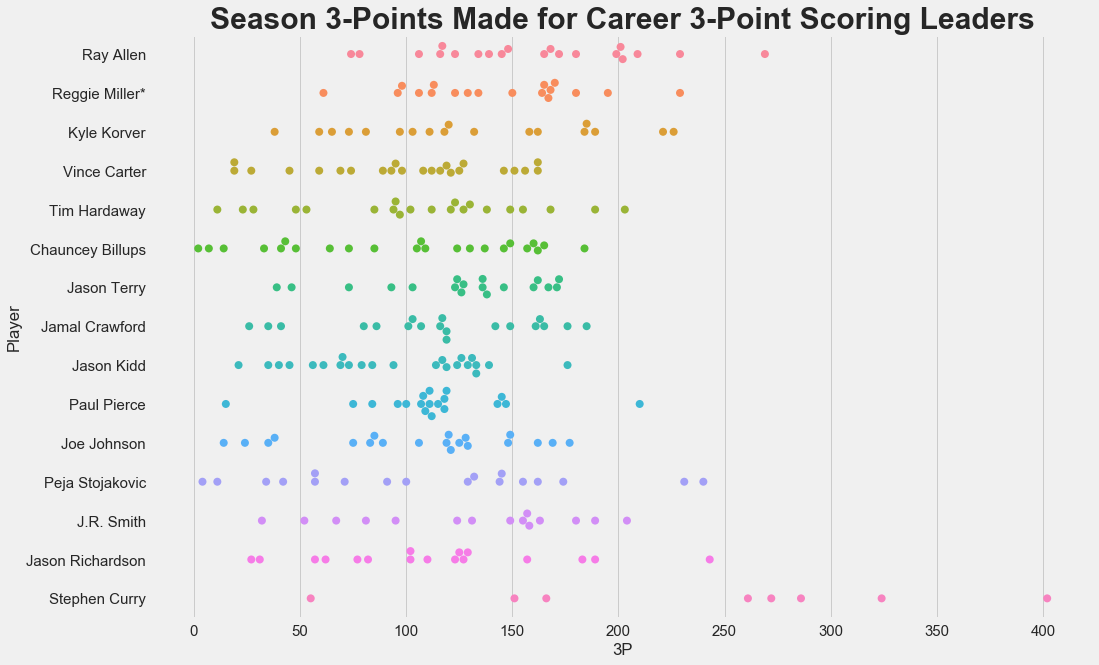

In [477]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

# filter by top-15 career 3-pt shooters
top_shooters_seasons = stats[stats['Player'].isin(top_shooters.index)][['Player', 'Year', '3P']]

# sort by career 3-pt ranking
top_shooters_seasons.Player = top_shooters_seasons.Player.astype("category")
top_shooters_seasons.Player.cat.set_categories(top_shooters.index, inplace=True)
top_shooters_seasons.sort_values(['Player'])

sns.swarmplot(x='3P', y='Player', data=top_shooters_seasons, size=8)
plt.title("Season 3-Points Made for Career 3-Point Scoring Leaders", weight = 'bold', size = 30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


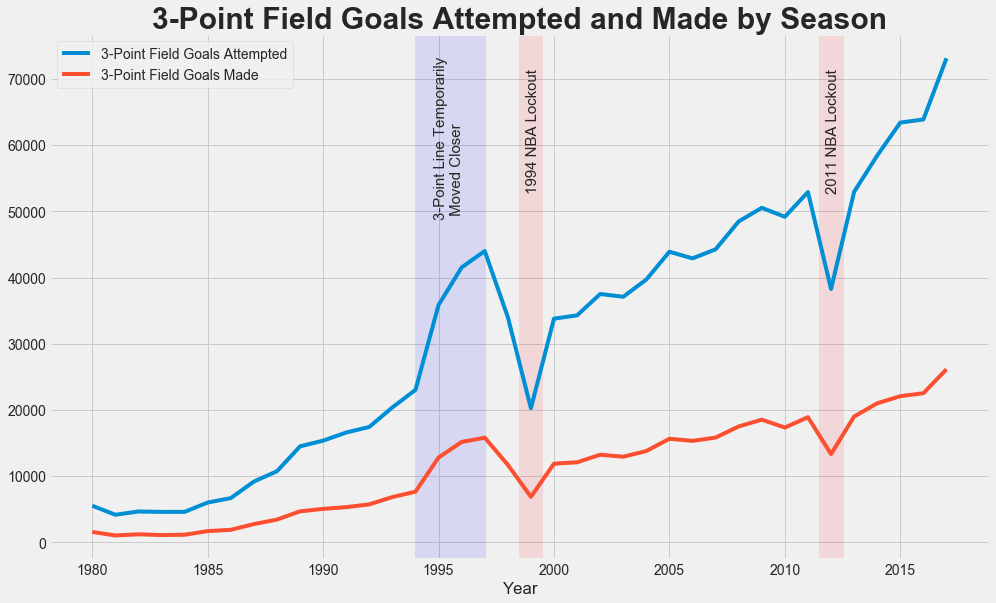

In [221]:
plt.style.use('fivethirtyeight')

three_year = stats[stats['Year'] > 1979]
three_year = three_year.groupby('Year')[['3PA', '3P']].sum()
three_year = three_year.rename(columns={"3PA": "3-Point Field Goals Attempted", 
                                        "3P": "3-Point Field Goals Made"})
three_year.plot(figsize=(15,9))

plt.title("3-Point Field Goals Attempted and Made by Season", weight = 'bold', size = 30)
plt.legend(frameon=True)

plt.axvspan(1998.5, 1999.5, alpha=0.1, color='r')
plt.text(1998.8, 70000, '1994 NBA Lockout', fontsize=15, rotation=90)
plt.axvspan(2011.5, 2012.5, alpha=0.1, color='r')
plt.text(2011.8, 70000, '2011 NBA Lockout', fontsize=15, rotation=90)
plt.axvspan(1994, 1997, alpha=0.1, color='blue')
plt.text(1994.8, 70000, '3-Point Line Temporarily \n Moved Closer', fontsize=15, rotation=90)

plt.show()

Text(1994.8,0.42,'3-Point Line Temporarily \n Moved Closer')

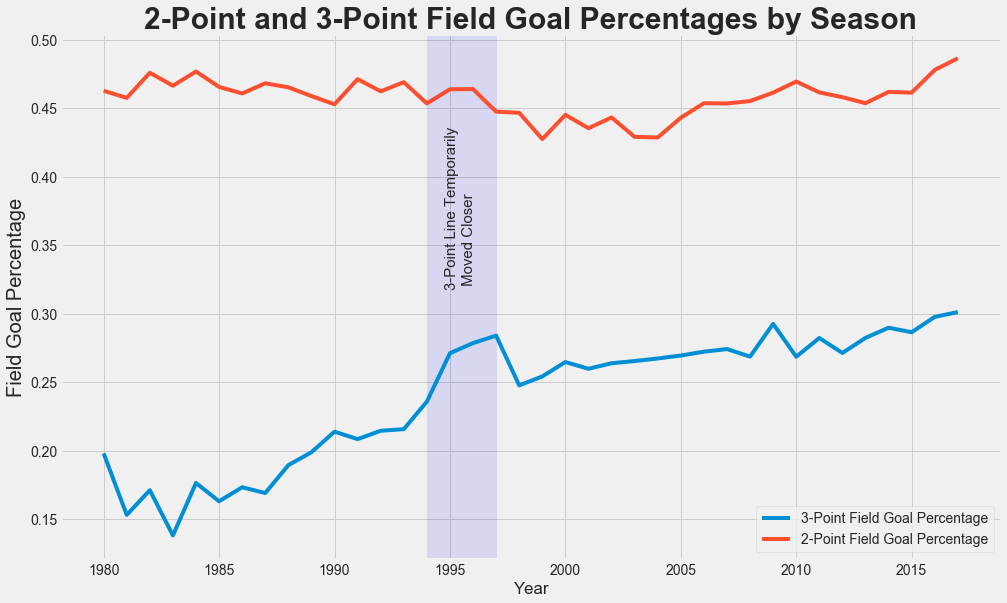

In [201]:
plt.style.use('fivethirtyeight')

pct_year = stats[stats['Year'] > 1979]
pct_year = pct_year.groupby('Year')[['3P%', '2P%']].mean()
pct_year = pct_year.rename(columns={"3P%": "3-Point Field Goal Percentage", 
                                    "2P%": "2-Point Field Goal Percentage"})
pct_year.plot(figsize=(15,9))

plt.title("2-Point and 3-Point Field Goal Percentages by Season", weight = 'bold', size = 30)
plt.ylabel("Field Goal Percentage", fontsize=20)
plt.legend(frameon=True)

plt.axvspan(1994, 1997, alpha=0.1, color='blue')
plt.text(1994.8, 0.42, '3-Point Line Temporarily \n Moved Closer', fontsize=15, rotation=90)